# Heart Diseases
Heart Diseases or cardiovascular disease are  the leading cause of death in the world with an taking lives of an estimated 17.9 million people.These heart diseases include cerebrovascular disease, rheumatic heart disease . WHO States,"Four out of 5 deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age".

Taking these notions into consideration, we'll be analyzing the behavioural and physical factors of heart diseases.

In [1]:
project_name = "heart diseases - data analysis" 

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian

In [4]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

## Data Preparation and Cleaning

We will be importing 2 datasets; heart.csv and cardiovascular.csv.

file1 will read heart.csv and file2 will read cardiovascular.csv.

In [5]:
import os

In [6]:
os.getcwd()

'/home/jovyan'

In [7]:
file1 = open('./heart.csv',mode='r')

In [8]:
file1_content=file1.read()

In [9]:
import pandas as pd

In [10]:
file1_df =pd.read_csv('heart.csv')

  File1 consists of sex,target..etc  with integer values , for making it more understandable we will be replacing these     values with some string values.

to DO this we need to convert the data type for these columns to string ,we will use '.astype' function to convert it 
from integer to string.

In [11]:
file1_df['sex'] = file1_df['sex'].astype('str')
file1_df['target'] = file1_df['target'].astype('str')

after changing the datatype, now we can assign the desired string value to these columns ,we will be replacing the values using 
.loc function.

In [12]:
file1_df.loc[file1_df.sex == '1','sex'] = 'M'
file1_df.loc[file1_df.sex == '0','sex'] = 'F'


In [13]:
file1_df.loc[file1_df.target == '1','target'] = 'T'
file1_df.loc[file1_df.target == '0','target'] = 'F'

In [14]:
file1_df.loc[file1_df.target == 'T','target'] = '0'
file1_df.loc[file1_df.target == 'F','target'] = '1'

To clearly understand what each of the columns represents we will be using the full column name. we will rename the column names using .rename(),the 'inplace = True' makes changes to the original dataset

In [15]:
file1_df.rename(columns={'chol':'cholesterol'}, inplace=True)
file1_df.rename(columns={'cp':'chestpain'}, inplace=True)

Although the dataset consists of other informations, we will limit our data to age,sex,cholesterol,chestpain type and target 
which  gives the status of heart disease in a person.

In [16]:
heart_df = file1_df[['age','sex','cholesterol','chestpain','target']]


### now we will be looking into our 2nd dataset- 'cardiovascular.csv'

In [17]:
file2 = open('./cardiovascular.csv',mode='r')

In [18]:
file2_content = file2.read()

In [19]:
file2_df=pd.read_csv('cardiovascular.csv')
file2_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [20]:
file2_df.rename(columns={'alco':'alcohol_intake'}, inplace=True)
file2_df.rename(columns={'gender':'sex'}, inplace=True)
file2_df.rename(columns={'gluc':'glucose'}, inplace=True)


In [21]:
file2_df['sex'] = file2_df['sex'].astype(str)
file2_df['smoke'] = file2_df['smoke'].astype(str)
file2_df['active'] = file2_df['active'].astype(str)
file2_df['alcohol_intake'] = file2_df['alcohol_intake'].astype(str)
file2_df['cardio'] = file2_df['cardio'].astype(str)
file2_df['cholesterol'] = file2_df['cholesterol'].astype(str)
file2_df['glucose'] = file2_df['glucose'].astype(str)
file2_df['weight'] = file2_df['weight'].astype(int)
file2_df['height'] = file2_df['height'].astype(int)



In [22]:
file2_df.loc[file2_df.smoke == '0','smoke'] = 'No'
file2_df.loc[file2_df.smoke == '1','smoke'] = 'Yes'

file2_df.loc[file2_df.alcohol_intake == '0','alcohol_intake'] = 'No'
file2_df.loc[file2_df.alcohol_intake == '1','alcohol_intake'] = 'Yes'

In [23]:
file2_df.loc[file2_df.sex == '1','sex'] = 'F'
file2_df.loc[file2_df.sex == '2','sex'] = 'M'



In [24]:
file2_df.loc[file2_df.cholesterol == '1','cholesterol'] = 'Normal'
file2_df.loc[file2_df.cholesterol == '2','cholesterol'] = 'Above Normal'
file2_df.loc[file2_df.cholesterol == '3','cholesterol'] = 'Well Above Normal'


file2_df.loc[file2_df.glucose == '1','glucose'] = 'Normal'
file2_df.loc[file2_df.glucose == '2','glucose'] = 'Above Normal'
file2_df.loc[file2_df.glucose == '3','glucose'] = 'Well Above Normal'

In [25]:
file2_df['age( in years )'] = file2_df['age']/356



In [26]:
file2_df['age( in years )']= round(file2_df['age( in years )'])


In [27]:
file2_df

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alcohol_intake,active,cardio,age( in years )
0,18393,M,168,62,110,80,Normal,Normal,No,No,1,0,52.0
1,20228,F,156,85,140,90,Well Above Normal,Normal,No,No,1,1,57.0
2,18857,F,165,64,130,70,Well Above Normal,Normal,No,No,0,1,53.0
3,17623,M,169,82,150,100,Normal,Normal,No,No,1,1,50.0
4,17474,F,156,56,100,60,Normal,Normal,No,No,0,0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,M,168,76,120,80,Normal,Normal,Yes,No,1,0,54.0
69996,22601,F,158,126,140,90,Above Normal,Above Normal,No,No,1,1,63.0
69997,19066,M,183,105,180,90,Well Above Normal,Normal,No,Yes,0,1,54.0
69998,22431,F,163,72,135,80,Normal,Above Normal,No,No,0,1,63.0


In [28]:
cardio_df = file2_df[['sex','age( in years )','height','weight','cholesterol','glucose','smoke','alcohol_intake','cardio']].sample(200)

In [29]:
cardio_df

,sex,age( in years ),height,weight,cholesterol,glucose,smoke,alcohol_intake,cardio
33073,M,41.0,170,74,Normal,Normal,No,No,0
23890,F,51.0,165,65,Normal,Normal,No,No,1
47030,F,62.0,155,57,Above Normal,Normal,No,No,1
30018,F,56.0,159,81,Normal,Normal,No,No,1
66651,M,53.0,178,104,Normal,Normal,No,No,1
...,...,...,...,...,...,...,...,...,...
37749,F,62.0,164,67,Normal,Normal,No,No,1
66565,M,63.0,160,80,Normal,Normal,No,No,1
33910,F,41.0,150,65,Normal,Normal,No,No,0
43053,M,64.0,170,88,Well Above Normal,Well Above Normal,No,No,1


In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

## Exploratory Analysis and Visualization



The dataset heart_df consists  303 records of patients with and without any heart disease. It consists of 5 columns : age,sex,cholestrol levels,chestpain,target.
The severity of chest pain is given in numeric values from 0 to 4. 0 denoting the absence of any pain and so on.
Target shows the presence of heart disease:
- 0 means absence of  heart disease
- 1 means presence of  heart disease


To understand about the variation and co-relation of heart ,lets look into the demographics.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np




# AGE

Age is a serious factor when it comes to health .The ages of the people in this dataset-heart varies from 30 to 63.
To elaborate and explain the co-relation of heart disease with age factor effectively, lets visualize the same:




In [33]:
plt.rcParams["figure.figsize"] = [15,5]

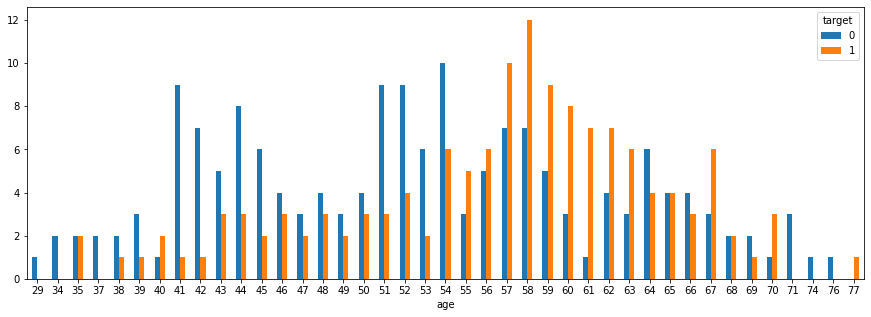

In [34]:
df=heart_df.groupby(['age','target']).size()
df=df.unstack()
df.plot.bar(rot=0);

From the barplot ,we can observe the variation of the presence and absence of heart disease with age.
we can see that most of the patients suffering from heart diseases belong ages above 54,with max number from the age 58.
we can roughly say that as age increases , many become prone to heart diseases.

As we age, so does our blood vessels. They become less flexible, making it harder for blood to move through them easily. 
Fatty deposits called plaques also collect along your artery walls and slow the blood flow from the heart. These things, 
along with poor nutrition and exercise habits, can increase our risk of heart diseases.




# GENDER
There is conisderable variation of heart disease among different genders. For better understandind the difference of presence of heart diseases among males and female ,lets take a look at the graph.

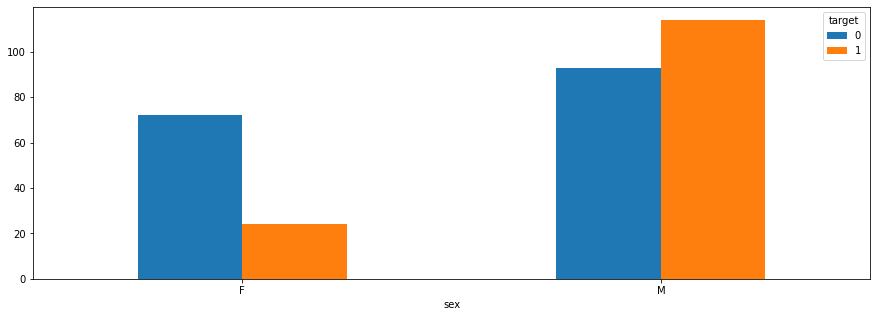

In [35]:
df1=heart_df.groupby(['sex','target']).size()
df1=df1.unstack()
df1.plot.bar(rot=0);



This clearly shows that males are more prone to acquiring heart disease.Taking only gender into consideration
,according to researches ,men are twice as prone to get heart diseases than females.This can be due to differences in their 
coping mechanisms, behavioural and psychological response to stress.

It was previously assumed only men suffered from heart disease, but this is not TRUE, women and men are both equally prone to
heart diseases.it is only that men suffer from heart diseases at an early age than women.

# Cholesterol level

Cholesterol is a waxy substance. In fact,our body needs it to build cells.

Cholesterol comes from two sources. Our liver makes all the cholesterol we need. The remainder of the cholesterol in your body comes from foods derived from animals. For example, meat, poultry and full-fat dairy products all contain cholesterol, called dietary cholesterol.

Those same foods are high in saturated and trans fats. Those fats cause your liver to make more cholesterol than it otherwise would. For some people, this added production means they go from a normal cholesterol level to one that’s unhealthy.

Is the "normal cholestrol level" same for people of all age and gender?
No.The cholestrol level varies with age and gender.


### Cholesterol vs Age and Gender

In [36]:
plt.rcParams["figure.figsize"] = [20,5]

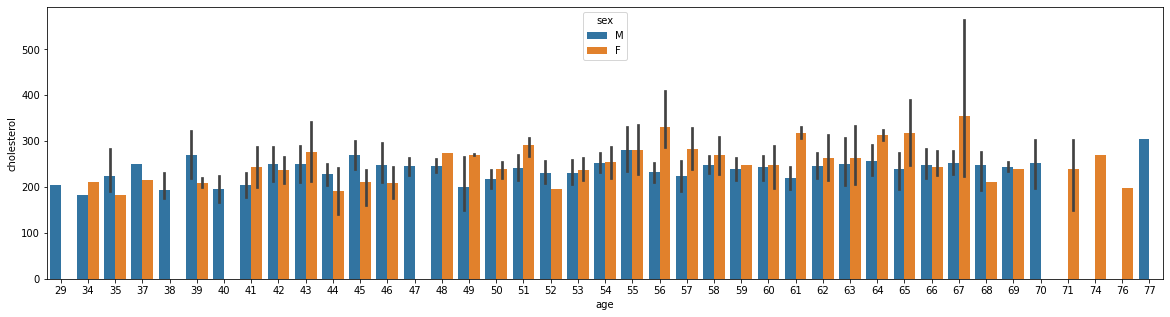

In [37]:
sns.barplot('age','cholesterol',hue='sex',data=heart_df);

The average cholesterol level increases as we age.
Because your body's chemistry changes as you age, your risk of high cholesterol climbs.
For instance, as you age, your liver becomes less able to remove LDL cholesterol.

While younger men are more prone to developing high cholesterol, a higher proportion of women than men have elevated cholesterol levels after they reach menopause.

Excess sugar is known to contribute to obesity, diabetes, and other conditions linked to heart diseases.

## Smoke and Cholesterol level

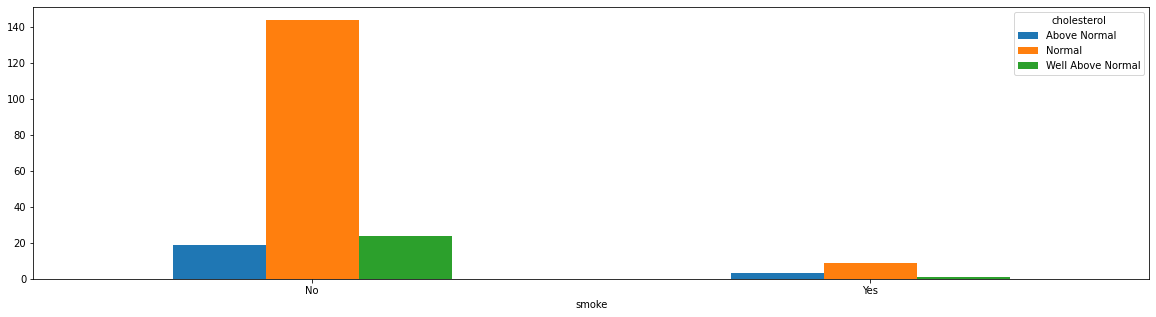

In [38]:
df1=cardio_df.groupby(['smoke','cholesterol']).size()
df1=df1.unstack()
df1.plot.bar(rot=0);


The above shown bar plot shows Number of people (y-axis) with their respective cholesterol level vs whether if they
smoke: Yes and No(x-axis).This bar plot shows that very few number of people who smoke have normal cholesterol levels,
whereas many who do not smoke have Normal CHOLESTEROL LEVEL.

##  Alcohol 

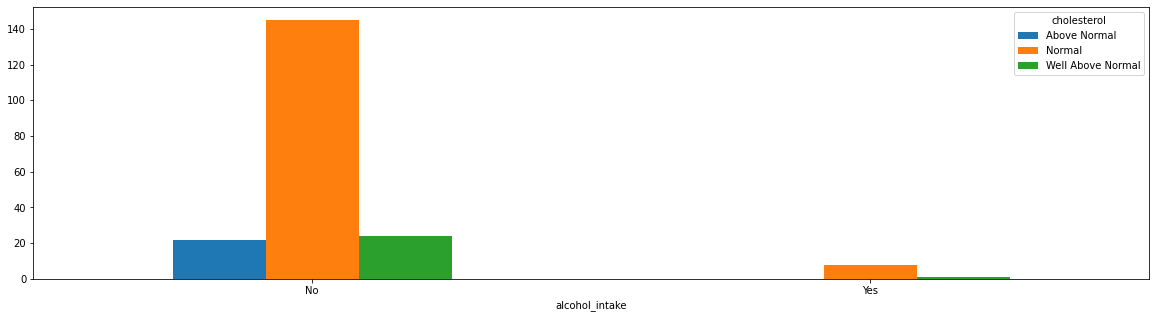

In [39]:
df1=cardio_df.groupby(['alcohol_intake','cholesterol']).size()
df1=df1.unstack()
df1.plot.bar(rot=0);


Heavy drinking is linked to a number of poor health outcomes, including heart conditions. Excessive alcohol intake can lead to high blood pressure, heart failure or stroke. Excessive drinking can also contribute to cardiomyopathy, a disorder that affects the heart muscle.

In [40]:
import jovian

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

## Asking and Answering Questions

Lets look into some questions to clarify any confusion or myths regarding heart diseases.

#### Q. Does Sharp Chest pain always mean high cholesterol and an onset of heart disease?

In [42]:
heart_df[(heart_df.chestpain == 3) & (heart_df.target == '0')]

,age,sex,cholesterol,chestpain,target
0,63,M,233,3,0
13,64,M,211,3,0
14,58,F,283,3,0
17,66,F,226,3,0
19,69,F,239,3,0
24,40,M,199,3,0
34,51,M,213,3,0
58,34,M,182,3,0
62,52,M,186,3,0
83,52,M,298,3,0


In most cases sharp chest pain is not a result of heart diesease.The above shown data shows that it is 
not necessary for a person having chest pain be suffering fro heart disease or have high cholesterol.

#### Q.Is high cholesterol the reason of heart diseases?

In [43]:
cardio_df[cardio_df.cholesterol == 'Well Above Normal'][['cholesterol','glucose','cardio']]

,cholesterol,glucose,cardio
13963,Well Above Normal,Well Above Normal,1
5656,Well Above Normal,Normal,0
47531,Well Above Normal,Above Normal,0
30601,Well Above Normal,Well Above Normal,1
18216,Well Above Normal,Normal,1
58793,Well Above Normal,Normal,0
67323,Well Above Normal,Normal,1
6212,Well Above Normal,Above Normal,1
34546,Well Above Normal,Well Above Normal,1
28697,Well Above Normal,Well Above Normal,1


In [44]:
heart_df[heart_df.cholesterol > 250].max()

age             77
sex              M
cholesterol    564
chestpain        3
target           1
dtype: object

No , it is not necessary for a person suffering from heart disease to have high cholesterol or vise-versa.New international study shows that LDL-cholesterol is unable to predict future cardiovascular events and fails to identify those coronary heart disease patients who are at the highest risk and who would benefit most from additional attention and preventive action.But cholesterol is a mojor risk factor.

#### Q.What are highest levels of cholesterol in the data provided?

In [45]:
heart_df[['cholesterol','target']].sort_values('cholesterol',ascending=False).head(10)

,cholesterol,target
85,564,0
28,417,0
246,409,1
220,407,1
96,394,0
39,360,0
4,354,0
180,353,1
161,342,0
215,341,1


From this data we can conclude high cholesterol do not necessarily mean ,You suffer from heart disease and vice versa. A person having cholesterol of 564, does not suffer from heart disease , but a person with 341 cholesterl does suffer.
Our body consists of 2 types of cholesterol :
-LDL or "Bad Cholesterol "
-HDL or "Good Cholesterol"

The cholesterol levels are evaluated taking of these values into consideration .

Too much of LDL is harmful for our body and can lead to Heart Diseases.and it is encouraged to keep HDL cholesterol in sufficient amount.

#### Q. How many patients have abnormal glucose level and abnormal cholesterol level and  consume alcohol or  smoke?

In [46]:
cardio_df[(cardio_df.cholesterol != 'Normal')
          &(cardio_df.glucose != 'Normal') 
          & (cardio_df.alcohol_intake == 'Yes')
          | (cardio_df.smoke =='Yes')]

,sex,age( in years ),height,weight,cholesterol,glucose,smoke,alcohol_intake,cardio
51232,M,53.0,171,90,Normal,Well Above Normal,Yes,No,0
54286,M,61.0,174,80,Above Normal,Normal,Yes,No,1
14733,M,49.0,170,72,Normal,Normal,Yes,No,1
5258,M,62.0,164,69,Normal,Normal,Yes,No,0
38282,M,53.0,166,64,Normal,Normal,Yes,No,0
17899,F,52.0,162,60,Normal,Above Normal,Yes,Yes,0
31314,M,51.0,158,54,Well Above Normal,Well Above Normal,Yes,Yes,1
26551,M,61.0,159,73,Normal,Normal,Yes,Yes,0
44956,M,56.0,175,92,Normal,Normal,Yes,No,1
36811,F,40.0,171,79,Above Normal,Normal,Yes,No,0


The chemical in tabacoo undoubtedly harms the internal organs of our body and its functioning , including  heart, blood vessels, lungs, eyes, bones, bladder,digestive organs, reproductive organs, mouth. Tabacoo causes the detoriation of blood vessels in the heart and can lead to a disease called atherosclerosis.Any amount of smoking, light snoking or second hand smoking can cause damage to heart and blood vessels.

###### LETS compare age ,cardio status and BMI level 

Add a column BMI 

In [47]:
cardio_df['BMI'] = (cardio_df['weight']/(cardio_df['height']*0.01)**2)

Categorize BMI values based on their values .

In [48]:
cardio_df['BMI_LEVEL'] = pd.cut(x=cardio_df['BMI'], bins=[10, 18.5, 25, 30, 50], labels=['under weight', 'normal', 'overweight','very overweight'])
cardio_df

,sex,age( in years ),height,weight,cholesterol,glucose,smoke,alcohol_intake,cardio,BMI,BMI_LEVEL
33073,M,41.0,170,74,Normal,Normal,No,No,0,25.605536,overweight
23890,F,51.0,165,65,Normal,Normal,No,No,1,23.875115,normal
47030,F,62.0,155,57,Above Normal,Normal,No,No,1,23.725286,normal
30018,F,56.0,159,81,Normal,Normal,No,No,1,32.039872,very overweight
66651,M,53.0,178,104,Normal,Normal,No,No,1,32.824138,very overweight
...,...,...,...,...,...,...,...,...,...,...,...
37749,F,62.0,164,67,Normal,Normal,No,No,1,24.910767,normal
66565,M,63.0,160,80,Normal,Normal,No,No,1,31.250000,very overweight
33910,F,41.0,150,65,Normal,Normal,No,No,0,28.888889,overweight
43053,M,64.0,170,88,Well Above Normal,Well Above Normal,No,No,1,30.449827,very overweight


In [49]:
cardio_df[['age( in years )','cardio','BMI_LEVEL']]


,age( in years ),cardio,BMI_LEVEL
33073,41.0,0,overweight
23890,51.0,1,normal
47030,62.0,1,normal
30018,56.0,1,very overweight
66651,53.0,1,very overweight
...,...,...,...
37749,62.0,1,normal
66565,63.0,1,very overweight
33910,41.0,0,overweight
43053,64.0,1,very overweight


Body Mass Index is an estimate measure of body mass in proprtion to our height.and an=bnorml level of BMI can conclude gain in
weight or disproportionate weight.The higher your BMI , the more your are at risk of acquiring a heart disease,high blood 
pressure and diabetes.Weight gain is the first sign that your heart failure is getting worse.

In [50]:
import jovian

In [51]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

## Inferences and Conclusion



From the above data , we can conclude that heart diseases are depended on many factors, heart disease tends to worsen with our 
bad addictions. 
A s mentioned earlier , heart disease are one of the main f causes of death over the world .Now the cases have worsened to school children suffering from cardiac arrests .
THIS does conclude that healthy habits need to be installed in us from an early age.

- Our Bodies become senstitive ove rtime and need tobe taken care of.

- Heart disease can become an easy risk as we age ,hence , it is needed that we manage a healthy lifetsyle.

- We might think , cholesterl as theonly risk factor, but it not the only, our genetic factors, glucose level 
   as well as our lifetsyle affects this .
   
- Alcohol comsumption damages the heart muscles and must be in control or best be put to stop.

- Smoking is an overall  killer ,affecting almost all the internal organs and not only us but also those who are exposed to our smoke , in other words ,those who breath smoky air.

- Maintain a stable glucose level, patients with diabetes are more at risk to heart failures than others.

- EXCRCISE regularly , mantain a healthy life ,quit smoking and alcohol.

In [52]:
import jovian

In [53]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

## References and Future Work




- National Heart , Blood and Lung institute
- Heart Disease UCI ,dataset
- Cardiovascular Disease dataset, Kaggle

There is abundant information available,
based on all this , we will be looking further deep into the mechansim of heart diseases,

- taking a deep dive into the genes involved
- the heiracrchy of heart diseases
- types and variations of heart disease
- comparison of the effectiveness of drugs 
- use of deep learning and AI 


In [54]:
import jovian

In [55]:
jovian.commit()
jovian.commit(files=['heart.csv','cardiovascular.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ayshaasif14/heart-diseases-data-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/ayshaasif14/heart-diseases-data-analysis


'https://jovian.ml/ayshaasif14/heart-diseases-data-analysis'

In [56]:
file1.close()
file2.close()